In [1]:
import os
import pandas as pd
import csv
import numpy as np
import random
import glob
import matplotlib
import matplotlib.pyplot as plt
import random
import subprocess
get_ipython().magic('matplotlib inline')

In [2]:
df = pd.read_csv("/user/mapr/part-00000-01a04734-16e3-4958-b21c-f2469fc7af65.csv").sort_values(['TimeStamp'], ascending=True).reset_index()

In [3]:
df.drop(['::[scararobot]Ax_J1.PositionCommand','::[scararobot]Ax_J1.TorqueFeedback','::[scararobot]Ax_J2.PositionCommand','::[scararobot]Ax_J2.TorqueFeedback','::[scararobot]Ax_J3.TorqueFeedback',
'::[scararobot]Ax_J6.TorqueFeedback','::[scararobot]ScanTimeAverage','::[scararobot]Ax_J6.PositionCommand','::[scararobot]Ax_J3.PositionCommand','index'], axis=1, inplace=True)
df['TimeStamp']=pd.to_datetime(df['TimeStamp'])
print (len(df))
df.head(5)

81568


,TimeStamp,::[scararobot]Ax_J1.ActualPosition,::[scararobot]Ax_J1.PositionError,::[scararobot]Ax_J1.TorqueCommand,::[scararobot]Ax_J2.ActualPosition,::[scararobot]Ax_J2.PositionError,::[scararobot]Ax_J2.TorqueCommand,::[scararobot]Ax_J3.ActualPosition,::[scararobot]Ax_J3.PositionError,::[scararobot]Ax_J3.TorqueCommand,::[scararobot]Ax_J6.ActualPosition,::[scararobot]Ax_J6.PositionError,::[scararobot]Ax_J6.TorqueCommand,::[scararobot]CS_Cartesian.ActualPosition[0],::[scararobot]CS_Cartesian.ActualPosition[1],::[scararobot]CS_Cartesian.ActualPosition[2],::[scararobot]CS_SCARA.ActualPosition[0],::[scararobot]CS_SCARA.ActualPosition[1],::[scararobot]CS_SCARA.ActualPosition[2],::[scararobot]speed
0,2016-07-22 14:02:54.084,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.0
1,2016-07-22 14:02:54.134,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.0
2,2016-07-22 14:02:54.137,60.671337,0.37341,12.8,-55.189659,0.015765,2.7,10.6520,0.630938,57.000000,-338.295074,-2.640736,-11.2,307.978271,177.130295,-0.15839,60.671337,-55.189659,-0.15839,100.0
3,2016-07-22 14:02:54.184,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.0
4,2016-07-22 14:02:54.187,61.989475,0.37836,12.8,-55.172352,0.015171,2.8,10.8535,0.634250,56.700001,-343.970001,-2.544077,-10.5,303.798065,184.259003,-0.14125,61.989475,-55.172352,-0.14125,100.0


In [4]:
df.tail()

,TimeStamp,::[scararobot]Ax_J1.ActualPosition,::[scararobot]Ax_J1.PositionError,::[scararobot]Ax_J1.TorqueCommand,::[scararobot]Ax_J2.ActualPosition,::[scararobot]Ax_J2.PositionError,::[scararobot]Ax_J2.TorqueCommand,::[scararobot]Ax_J3.ActualPosition,::[scararobot]Ax_J3.PositionError,::[scararobot]Ax_J3.TorqueCommand,::[scararobot]Ax_J6.ActualPosition,::[scararobot]Ax_J6.PositionError,::[scararobot]Ax_J6.TorqueCommand,::[scararobot]CS_Cartesian.ActualPosition[0],::[scararobot]CS_Cartesian.ActualPosition[1],::[scararobot]CS_Cartesian.ActualPosition[2],::[scararobot]CS_SCARA.ActualPosition[0],::[scararobot]CS_SCARA.ActualPosition[1],::[scararobot]CS_SCARA.ActualPosition[2],::[scararobot]speed
81563,2016-07-22 14:36:54.591,-9.845747,0.178794,9.200000,-56.683796,0.022866,4.2,-2.082313,0.575875,51.200001,-4.413548,-2.181875,-9.7,263.284180,-235.104416,-1.63757,-9.845747,-56.683796,-1.63757,100.0
81564,2016-07-22 14:36:54.638,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.0
81565,2016-07-22 14:36:54.641,-9.509472,0.374418,13.400001,-56.352852,0.025160,4.9,-1.560187,0.534250,47.400002,-8.152490,-2.418651,-10.5,266.723145,-231.973419,-1.30939,-9.509472,-56.352852,-1.30939,100.0
81566,2016-07-22 14:36:54.890,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.0
81567,2016-07-22 14:36:54.915,-7.356689,-0.228186,-8.000000,-66.009476,0.033725,5.7,-13.065437,0.652938,55.200001,-1.496288,1.325858,5.6,237.619278,-238.899994,-12.17095,-7.356689,-66.009476,-12.17095,100.0


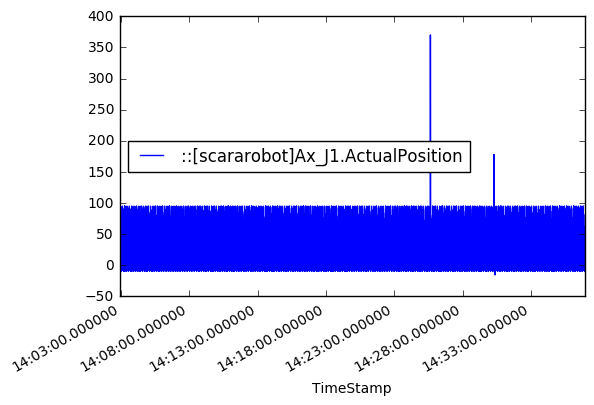

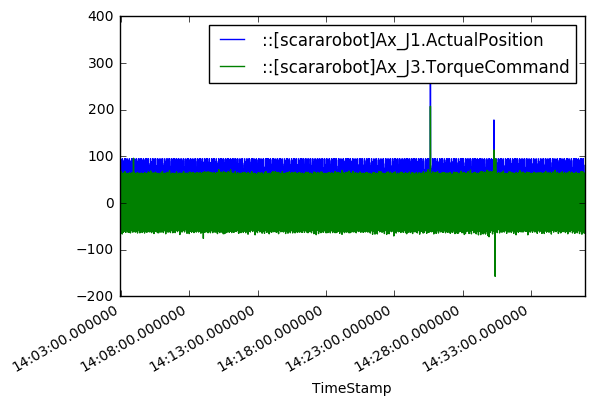

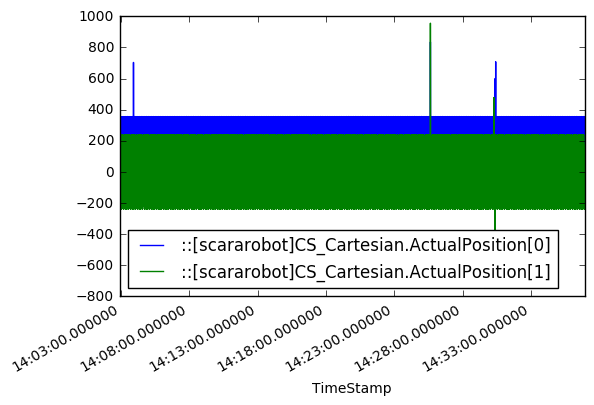

In [5]:
df.plot(x="TimeStamp", y="::[scararobot]Ax_J1.ActualPosition", kind="line")
df.plot(x="TimeStamp", y=["::[scararobot]Ax_J1.ActualPosition","::[scararobot]Ax_J3.TorqueCommand"], kind="line")
df.plot(x="TimeStamp", y=["::[scararobot]CS_Cartesian.ActualPosition[0]","::[scararobot]CS_Cartesian.ActualPosition[1]"], kind="line")


In [6]:
df['Total']= df.select_dtypes(include=['float64','float32']).apply(lambda row: np.sum(row),axis=1)
df.tail()

,TimeStamp,::[scararobot]Ax_J1.ActualPosition,::[scararobot]Ax_J1.PositionError,::[scararobot]Ax_J1.TorqueCommand,::[scararobot]Ax_J2.ActualPosition,::[scararobot]Ax_J2.PositionError,::[scararobot]Ax_J2.TorqueCommand,::[scararobot]Ax_J3.ActualPosition,::[scararobot]Ax_J3.PositionError,::[scararobot]Ax_J3.TorqueCommand,...,::[scararobot]Ax_J6.PositionError,::[scararobot]Ax_J6.TorqueCommand,::[scararobot]CS_Cartesian.ActualPosition[0],::[scararobot]CS_Cartesian.ActualPosition[1],::[scararobot]CS_Cartesian.ActualPosition[2],::[scararobot]CS_SCARA.ActualPosition[0],::[scararobot]CS_SCARA.ActualPosition[1],::[scararobot]CS_SCARA.ActualPosition[2],::[scararobot]speed,Total
81563,2016-07-22 14:36:54.591,-9.845747,0.178794,9.200000,-56.683796,0.022866,4.2,-2.082313,0.575875,51.200001,...,-2.181875,-9.7,263.284180,-235.104416,-1.63757,-9.845747,-56.683796,-1.63757,100.0,38.845338
81564,2016-07-22 14:36:54.638,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.000000
81565,2016-07-22 14:36:54.641,-9.509472,0.374418,13.400001,-56.352852,0.025160,4.9,-1.560187,0.534250,47.400002,...,-2.418651,-10.5,266.723145,-231.973419,-1.30939,-9.509472,-56.352852,-1.30939,100.0,44.408801
81566,2016-07-22 14:36:54.890,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.000000
81567,2016-07-22 14:36:54.915,-7.356689,-0.228186,-8.000000,-66.009476,0.033725,5.7,-13.065437,0.652938,55.200001,...,1.325858,5.6,237.619278,-238.899994,-12.17095,-7.356689,-66.009476,-12.17095,100.0,-26.632335


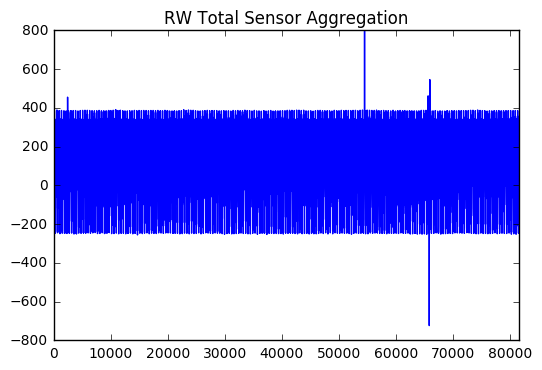

In [7]:
#convert into a time series object
ts = pd.Series(df['Total'])
ts.plot(c='b', title='RW Total Sensor Aggregation')


In [8]:
#prepare data and inputs for our TF model
num_periods = 100
f_horizon = 1       #number of periods into the future we are forecasting
TS = np.array(ts)   #convert time series object to an array
print (TS[0:10])
print (len(TS))

[  0.         0.       327.791445   0.       328.576018   0.
 330.423442   0.       333.020361   0.      ]
81568


In [9]:
#create our training input data set "X"
x_data = TS[:(len(TS)-(len(TS) % num_periods))]
print (x_data[0:5])
x_batches = x_data.reshape(-1, num_periods, 1)
print (len(x_batches))
print (x_batches.shape)

[  0.         0.       327.791445   0.       328.576018]
815
(815, 100, 1)


In [10]:
#create our training output dataset "y"
y_data = TS[1:(len(TS)-(len(TS) % num_periods))+f_horizon]
#print (y_data)
#print (len(y_data))
#y_data = TS[(num_periods+(f_horizon-1))::(num_periods)]
print (y_data)
print (len(y_data))
y_batches = y_data.reshape(-1, num_periods, 1)
print (len(y_batches))

[   0.        327.791445    0.       ...    0.       -228.425181
    0.      ]
81500
815


In [11]:
#create our test X and y data
def test_data(series,forecast,num_periods):
    test_x_setup = series[-(num_periods + forecast):]
    testX = test_x_setup[:num_periods].reshape(-1, num_periods, 1)
    testY = TS[-(num_periods):].reshape(-1, num_periods, 1)
    return testX,testY

X_test, Y_test = test_data(TS,f_horizon,num_periods)
print (X_test.shape)
print (X_test[:,(num_periods-1):num_periods])
print (Y_test.shape)
print (Y_test[:,(num_periods-1):num_periods])

(1, 100, 1)
[[[0.]]]
(1, 100, 1)
[[[-26.632335]]]


In [12]:
#import tensorflow libraries
import tensorflow as tf
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn

In [13]:
#set up our TF model parameters

tf.reset_default_graph()   #We didn't have any previous graph objects running, but this would reset the graphs

inputs = 1            #number of vectors submitted
hidden = 100          #number of neurons we will recursively work through, can be changed to improve accuracy
output = 1            #number of output vectors

X = tf.placeholder(tf.float32, [None, num_periods, inputs], name = "X")   #create variable objects
y = tf.placeholder(tf.float32, [None, num_periods, output], name = "y")


basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden, activation=tf.nn.relu)   
#create our RNN object
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)               
#choose dynamic over static

learning_rate = 0.001   #small learning rate so we don't overshoot the minimum
#tf.app.flags.DEFINE_float('learning_rate', 0.001, 'Initial learning rate.')

stacked_rnn_output = tf.reshape(rnn_output, [-1, hidden])           #change the form into a tensor
stacked_outputs = tf.layers.dense(stacked_rnn_output, output)        #specify the type of layer (dense)
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output])          #shape of results
 
loss = tf.reduce_sum(tf.square(outputs - y),name='loss')    #define the cost function which evaluates the quality of our model
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)          #gradient descent method
training_op = optimizer.minimize(loss)          #train the result of the application of the cost_function                                 

init = tf.global_variables_initializer()

epochs = 1000     #number of iterations or training cycles, includes both the FeedFoward and Backpropogation
saver = tf.train.Saver()   #we are going to save the model
DIR="/user/mapr/TFmodel"  #path where the model will be saved

In [14]:
with tf.Session() as sess:
    init.run()
    for ep in range(epochs):
        sess.run(training_op, feed_dict={X: x_batches, y: y_batches})
        if ep % 100 == 0:
            mse = loss.eval(feed_dict={X: x_batches, y: y_batches})
            print(ep, "\tMSE:", mse) 
            
    y_pred = sess.run(outputs, feed_dict={X: X_test})
    print(y_pred[:,(num_periods-1):num_periods])
    saver.save(sess, os.path.join(DIR,"IoT_TF_model"),global_step = epochs)

0 	MSE: 2425013200.0
100 	MSE: 381987680.0
200 	MSE: 328653340.0
300 	MSE: 297245470.0
400 	MSE: 280956130.0
500 	MSE: 265664960.0
600 	MSE: 250178420.0
700 	MSE: 241412450.0
800 	MSE: 235045550.0
900 	MSE: 228160800.0
[[[47.729893]]]


In [15]:
prediction_df = pd.DataFrame(list(zip(Y_test,y_pred)),columns=['ytest','ypred'])
print (prediction_df.tail(25))

                                               ytest  \
0  [[0.0], [33.17958900000001], [0.0], [14.387329...   

                                               ypred  
0  [[5.8821583], [41.0701], [9.995015], [36.23644...  


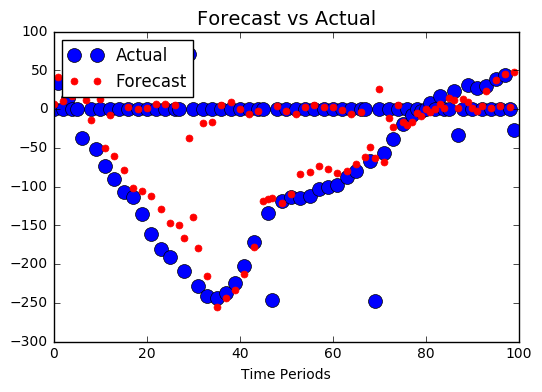

In [16]:
#Plot our test y data and our y-predicted forecast
plt.title("Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(Y_test)), "bo", markersize=10, label="Actual")
plt.plot(pd.Series(np.ravel(y_pred)), "r.", markersize=10, label="Forecast")
plt.legend(loc="upper left")
plt.xlabel("Time Periods")
plt.show()
